# ExtraaLearn Lead Conversion Prediction

## Project Overview
ExtraaLearn is an EdTech startup offering upskilling and reskilling programs through online platforms. Due to rapid growth in the EdTech industry and increased digital lead generation, the company receives a large volume of leads from multiple channels. Manually prioritizing these leads is inefficient and leads to suboptimal conversion outcomes.

This project focuses on using data-driven techniques to predict lead conversion likelihood and support the sales team in prioritizing high-potential leads.

---

## Business Context
The global EdTech industry has experienced rapid growth over the last decade, driven by increased internet penetration, personalized learning platforms, and transparent assessment mechanisms. The COVID-19 pandemic further accelerated this growth, bringing in a larger customer base and increasing competition among online education providers.

ExtraaLearn generates leads through multiple digital touchpoints such as website interactions, mobile applications, online advertisements, educational portals, and referrals. Once a lead is generated, the sales team contacts the lead via phone or email to provide further information and attempt conversion into a paid customer. Given the large volume of leads, there is a strong need to prioritize leads that are more likely to convert.

---

## Objective
The objective of this project is to build a machine learning solution that helps ExtraaLearn improve lead conversion efficiency. Specifically, the goals are:
- To predict the likelihood of a lead converting into a paid customer
- To identify the key factors influencing lead conversion
- To profile high-conversion-potential leads for effective sales prioritization

---

## Dataset Description
The dataset contains information about leads generated by ExtraaLearn through various channels. Each row represents a unique lead along with demographic details, engagement behavior, and marketing touchpoints.

### Target Variable
- **status**: Indicates whether a lead was converted into a paid customer  
  - 1 = Converted  
  - 0 = Not Converted

### Feature Description
- **ID**: Unique identifier for each lead
- **age**: Age of the lead
- **current_occupation**: Current occupation of the lead (Student, Professional, Unemployed)
- **first_interaction**: Platform through which the lead first interacted (Website or Mobile App)
- **profile_completed**: Percentage of profile completion categorized as Low, Medium, or High
- **website_visits**: Number of visits made to the website
- **time_spent_on_website**: Total time spent on the website in seconds
- **page_views_per_visit**: Average number of pages viewed per visit
- **last_activity**: Most recent interaction type (Email Activity, Phone Activity, or Website Activity)
- **print_media_type1**: Exposure to newspaper advertisements (Yes/No)
- **print_media_type2**: Exposure to magazine advertisements (Yes/No)
- **digital_media**: Exposure to digital advertisements (Yes/No)
- **educational_channels**: Lead source through educational forums or websites (Yes/No)
- **referral**: Lead acquired through referral (Yes/No)

This dataset is structured and suitable for binary classification modeling.

---

## Phase 0: Project Setup

### Section 0.1: Environment and Library Setup

In [ ]:
# Core libraries were imported for data handling and numerical operations
import numpy as np
import pandas as pd

# Visualization libraries were imported for exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn utilities were imported for preprocessing, modeling, and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, classification_report, confusion_matrix

# Tree-based models were imported as required by the rubric
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Library was imported for model serialization
import joblib

# Visualization style was set for consistency across plots
sns.set(style="whitegrid")

### Section 0.2: Dataset Upload and Loading

In [ ]:
# Dataset was loaded into a pandas DataFrame for initial inspection
df = pd.read_csv("ExtraaLearn.csv")

# First few records were displayed to verify successful loading
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


## Phase 1: Exploratory Data Analysis

### Section 1.1: Data Overview

In [ ]:
# Dataset shape was checked to understand the number of records and features
df.shape

(4612, 15)

In [ ]:
# Data types of all features were examined to distinguish numerical and categorical variables
df.dtypes

,0
ID,object
age,int64
current_occupation,object
first_interaction,object
profile_completed,object
website_visits,int64
time_spent_on_website,int64
page_views_per_visit,float64
last_activity,object
print_media_type1,object


In [ ]:
# Missing values were checked across all columns
df.isnull().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


In [ ]:
# Duplicate records were checked to ensure data quality
df.duplicated().sum()

np.int64(0)

In [ ]:
# Statistical summary was generated for numerical features
df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


### Section 1.2: Univariate Analysis

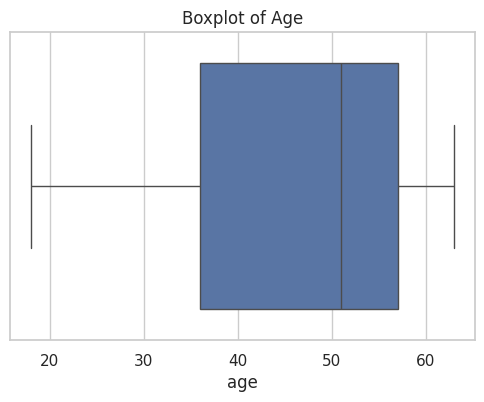

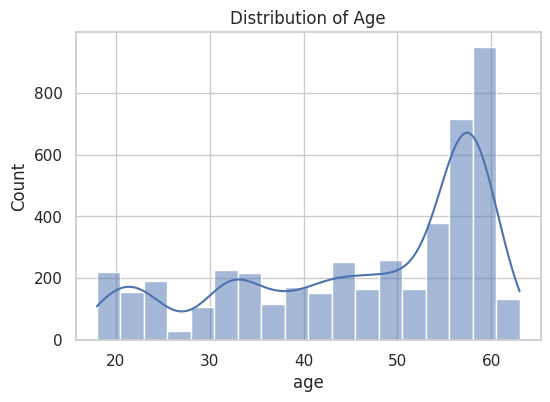

In [ ]:
# Distribution and spread of age were analyzed to understand demographic variation
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["age"])
plt.title("Boxplot of Age")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")
plt.show()

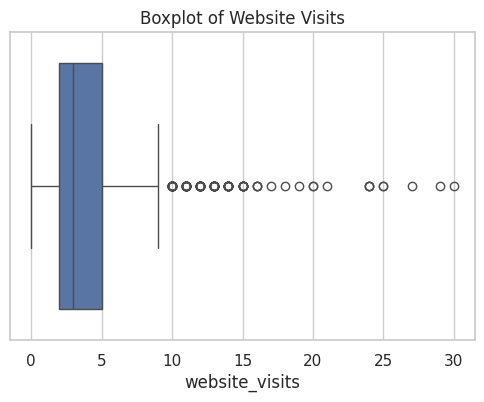

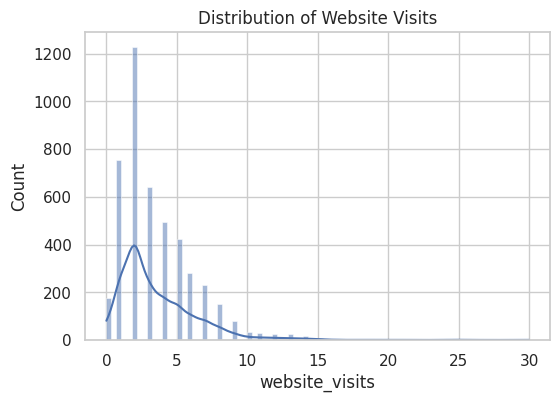

In [ ]:
# Distribution and spread of website visits were analyzed to assess engagement frequency
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["website_visits"])
plt.title("Boxplot of Website Visits")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df["website_visits"], kde=True)
plt.title("Distribution of Website Visits")
plt.show()

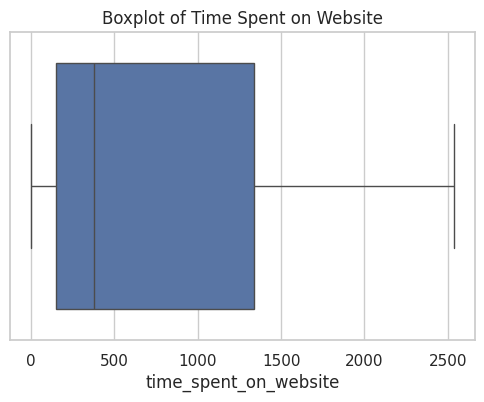

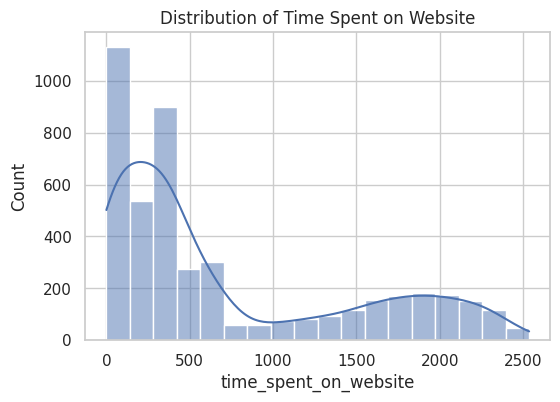

In [ ]:
# Time spent on website was analyzed to understand user engagement intensity
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["time_spent_on_website"])
plt.title("Boxplot of Time Spent on Website")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df["time_spent_on_website"], kde=True)
plt.title("Distribution of Time Spent on Website")
plt.show()

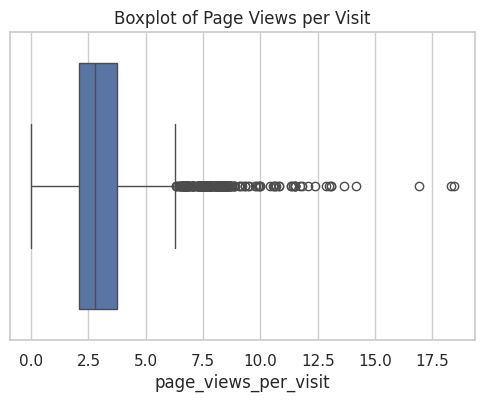

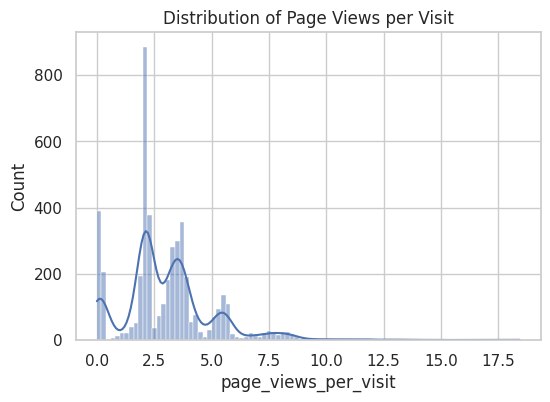

In [ ]:
# Page views per visit were analyzed to evaluate browsing depth
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["page_views_per_visit"])
plt.title("Boxplot of Page Views per Visit")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df["page_views_per_visit"], kde=True)
plt.title("Distribution of Page Views per Visit")
plt.show()

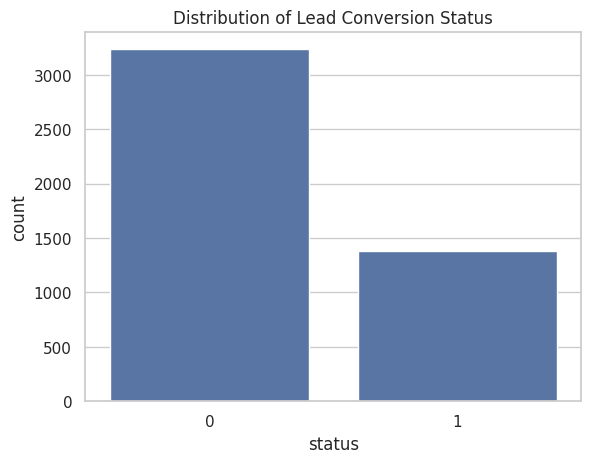

In [ ]:
# Distribution of the target variable was examined to understand class balance
sns.countplot(x=df["status"])
plt.title("Distribution of Lead Conversion Status")
plt.show()

### Section 1.3: Bivariate Analysis

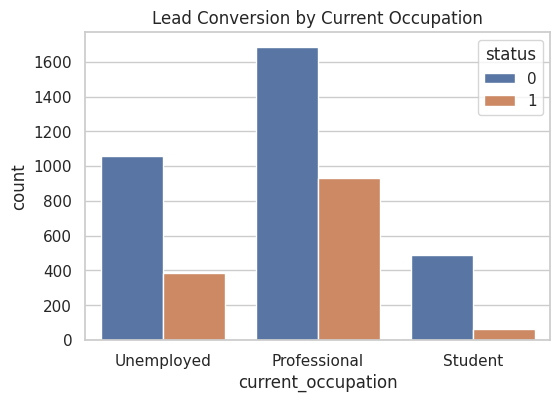

In [ ]:
# Relationship between current occupation and lead conversion status was analyzed
plt.figure(figsize=(6, 4))
sns.countplot(x="current_occupation", hue="status", data=df)
plt.title("Lead Conversion by Current Occupation")
plt.show()

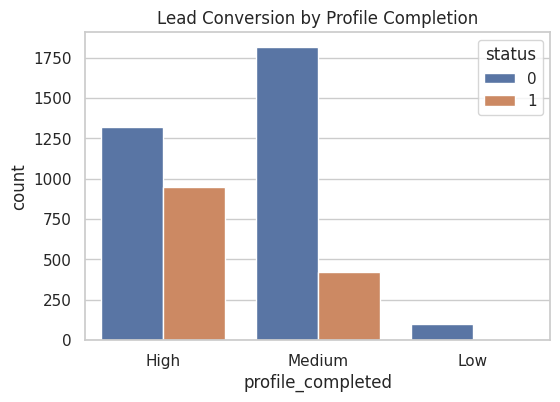

In [ ]:
# Impact of profile completion level on lead conversion was examined
plt.figure(figsize=(6, 4))
sns.countplot(x="profile_completed", hue="status", data=df)
plt.title("Lead Conversion by Profile Completion")
plt.show()

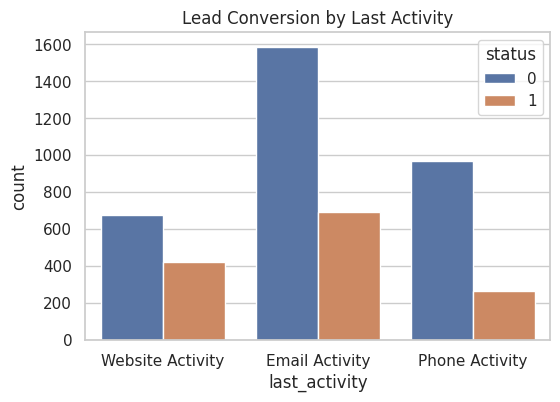

In [ ]:
# Effect of last recorded activity on lead conversion was analyzed
plt.figure(figsize=(6, 4))
sns.countplot(x="last_activity", hue="status", data=df)
plt.title("Lead Conversion by Last Activity")
plt.show()

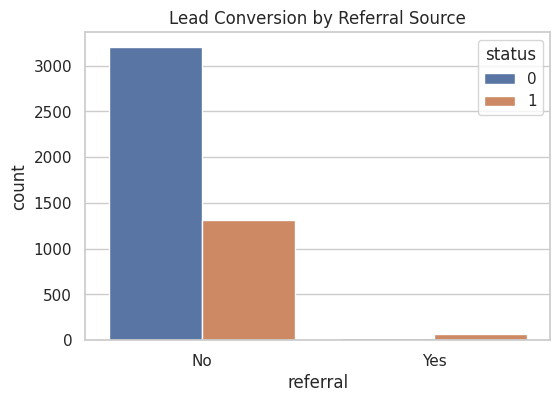

In [ ]:
# Influence of referral source on lead conversion was examined
plt.figure(figsize=(6, 4))
sns.countplot(x="referral", hue="status", data=df)
plt.title("Lead Conversion by Referral Source")
plt.show()

### Phase 2: Data Preprocessing & Feature Engineering  
#### Section 2.1: Target Variable Definition & Identifier Removal

In this section, the target variable is explicitly defined and non-informative identifier columns are removed.

- The target variable `status` represents lead conversion outcome.
- Identifier fields such as `ID` do not contribute predictive value and are removed to prevent noise and data leakage.
- The remaining dataset is prepared for feature-level preprocessing and modeling.

This step establishes a clean separation between features and target variables.

In [ ]:
# Separate target variable and drop identifier column
X = df.drop(columns=["status", "ID"])
y = df["status"]

#### Section 2.2: Train–Test Split

In this section, the dataset is split into training and testing sets to enable unbiased model evaluation.

- The data is divided into training and test subsets.
- Stratification is applied on the target variable to preserve class distribution.
- A fixed random state is used to ensure reproducibility.

This step ensures that model performance is evaluated on unseen data.

In [ ]:
# Dataset was split into training and testing sets with stratification on target variable
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#### Section 2.3: Feature Type Segregation

In this section, input features are categorized into numerical and categorical variables.

- Numerical features represent continuous or discrete numeric measurements.
- Categorical features represent qualitative attributes requiring encoding.
- This separation enables appropriate preprocessing techniques for each feature type.

This step prepares the dataset for pipeline-based preprocessing and modeling.

In [ ]:
# Numerical and categorical features were identified for preprocessing

numerical_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()

numerical_features, categorical_features

(['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit'],
 ['current_occupation',
  'first_interaction',
  'profile_completed',
  'last_activity',
  'print_media_type1',
  'print_media_type2',
  'digital_media',
  'educational_channels',
  'referral'])

#### Section 2.4: Preprocessing Pipeline and Encoding Strategy

In this section, preprocessing steps are defined for numerical and categorical features using a unified pipeline approach.

- Numerical features are passed without scaling as tree-based models are scale-invariant.
- Categorical features are encoded using One-Hot Encoding.
- A ColumnTransformer is used to apply transformations selectively by feature type.

This approach ensures clean, reproducible, and leakage-free preprocessing integrated with modeling.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preprocessing pipelines were defined for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features)
    ]
)

## Section 2.5: Baseline Model Pipeline (Decision Tree)

In this section, a baseline classification model is constructed using a Decision Tree to establish an initial performance benchmark.

- A unified pipeline is created by combining preprocessing and modeling steps.
- Decision Tree is chosen as a baseline due to its interpretability and ability to handle non-linear relationships.
- No hyperparameter tuning is applied at this stage to reflect raw model behavior.

This baseline helps assess whether the available features contain meaningful predictive signal.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Baseline Decision Tree model pipeline
dt_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(
        random_state=42,
        class_weight="balanced"
    ))
])

## Section 2.6: Model Training and Prediction

In this section, the baseline Decision Tree pipeline is trained on the training dataset and used to generate predictions on the test set.

- The entire pipeline (preprocessing + model) is fitted only on training data.
- Predictions are generated for unseen test data to evaluate generalization performance.
- This step ensures no data leakage and mirrors real-world deployment behavior.

In [ ]:
# Train the baseline Decision Tree pipeline
dt_pipeline.fit(X_train, y_train)

# Generate predictions on test data
y_pred_dt = dt_pipeline.predict(X_test)

## Section 2.7: Model Evaluation (Recall-Focused)

In this section, the baseline Decision Tree model is evaluated using classification metrics.

- Recall is prioritized as the primary evaluation metric to minimize missed conversions.
- A classification report is generated to assess overall model behavior.
- A confusion matrix is used to visualize prediction outcomes.
This evaluation establishes a performance benchmark for subsequent model improvements.

In [ ]:
# Import evaluation metrics
from sklearn.metrics import recall_score, classification_report, confusion_matrix

# Calculate recall score on test data
recall_dt = recall_score(y_test, y_pred_dt)

# Display recall score
print("Decision Tree Recall Score:", recall_dt)

# Generate classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))

# Generate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:\n")
print(cm_dt)

Decision Tree Recall Score: 0.6666666666666666

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       647
           1       0.71      0.67      0.69       276

    accuracy                           0.82       923
   macro avg       0.79      0.78      0.78       923
weighted avg       0.82      0.82      0.82       923


Confusion Matrix:

[[572  75]
 [ 92 184]]


## Section 2.8: Baseline Model Summary & Limitations

In this section, the performance of the baseline Decision Tree model is summarized and its limitations are documented.

### Baseline Performance Summary
- The Decision Tree model achieved a recall score of approximately **0.67** on the test dataset.
- This indicates that around two-thirds of actual converted leads were correctly identified.
- The model provides a reasonable initial signal, confirming that the available features contain predictive value.

### Limitations of the Baseline Model
- The Decision Tree is prone to overfitting and may not generalize optimally.
- No hyperparameter tuning was performed at this stage.
- Complex feature interactions may not be fully captured.
- Recall, while acceptable, leaves room for improvement in reducing missed conversions.

This baseline establishes a reference point for improving recall and overall performance using more advanced ensemble models.

## Section 3.1: Random Forest Model Pipeline (Baseline Ensemble)

In this section, a Random Forest classifier is introduced as an ensemble-based improvement over the baseline Decision Tree model.

### Why Random Forest?
- Combines multiple decision trees to reduce overfitting.
- Captures non-linear feature interactions more effectively.
- More stable and generalizable than a single tree.
- Well-suited for tabular, mixed-type data.

### Modeling Strategy
- The same preprocessing pipeline is reused to ensure consistency.
- Class imbalance is handled using `class_weight="balanced"`.
- No hyperparameter tuning is applied yet to establish a fair baseline comparison.

This model serves as the first performance upgrade candidate over the Decision Tree.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Random Forest baseline model pipeline
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    ))
])

## Section 3.2: Random Forest Model Training & Evaluation

In this section, the Random Forest pipeline is trained on the training dataset and evaluated on the test dataset.

### Objectives
- Train the Random Forest model using the same preprocessing pipeline.
- Generate predictions on unseen test data.
- Evaluate model performance with a focus on recall, as lead conversion is a recall-sensitive problem.
- Compare performance against the baseline Decision Tree.

This step determines whether ensemble learning provides a measurable improvement over the single-tree baseline.

In [ ]:
# Train the Random Forest pipeline on training data
rf_pipeline.fit(X_train, y_train)

# Generate predictions on test data
y_pred_rf = rf_pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import recall_score, classification_report, confusion_matrix

# Calculate recall score on test data
recall_rf = recall_score(y_test, y_pred_rf)

# Display recall score
print("Random Forest Recall Score:", recall_rf)

# Generate classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n")
print(cm_rf)

Random Forest Recall Score: 0.7137681159420289

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       647
           1       0.81      0.71      0.76       276

    accuracy                           0.86       923
   macro avg       0.85      0.82      0.83       923
weighted avg       0.86      0.86      0.86       923


Confusion Matrix:

[[600  47]
 [ 79 197]]


## Section 3.3: Hyperparameter Tuning (Random Forest)

In this section, hyperparameter tuning is performed on the Random Forest model to improve recall for lead conversion prediction.

### Objectives
- Optimize key Random Forest hyperparameters.
- Prioritize **recall** to minimize missed potential conversions.
- Use cross-validation to ensure robust and generalized performance.

### Strategy
- GridSearchCV is applied on selected hyperparameters.
- Recall is used as the primary scoring metric.
- The same preprocessing pipeline is reused to prevent data leakage.

This step aims to extract maximum performance from the ensemble model while aligning with business priorities.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyperparameter grid for Random Forest
param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 5, 10, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4]
}

In [ ]:
# Grid Search with Recall as primary metric
grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    scoring="recall",
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [ ]:
# Reduced hyperparameter grid for efficient tuning under compute constraints
param_grid_small = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10],
    "model__min_samples_split": [2, 5],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid Search with Recall as primary metric using reduced search space
grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_small,
    scoring="recall",
    cv=5,
    n_jobs=1,
    verbose=1
)

# Fit GridSearch on training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'website_visits',
                                                                          'time_spent_on_website',
                                                                          'page_views_per_visit']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['current_occupation',
                                                                          'first_interaction',
                                                                          'profile_completed',
                                                                          'last_activity',
                                                                          'print_media_type1',
                                                                          'print_media_type2',
                                                                          'digital_media',
                                                                          'educational_channels',
                                                                          'referral'])])),
                                       ('model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_estimators=200,
                                                               n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=1,
             param_grid={'model__max_depth': [None, 10],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='recall', verbose=1)

## Section 3.4: Best Model Selection & Final Evaluation

In this section, the best-performing model obtained from hyperparameter tuning is selected and evaluated on the test dataset.

### Objectives
- Select the optimized Random Forest model from GridSearchCV.
- Evaluate its performance on unseen test data.
- Focus on **recall** as the primary metric, since missing a converted lead is more costly than a false positive.
- Confirm that hyperparameter tuning provides a measurable improvement over baseline models.

This step finalizes the model that will be used for business interpretation and recommendations.

In [ ]:
# Extract the best estimator from GridSearchCV
best_model = grid_search.best_estimator_

# Generate predictions on test data
y_pred_best = best_model.predict(X_test)

# Evaluate recall score
best_recall = recall_score(y_test, y_pred_best)
print("Best Model Recall Score:", best_recall)

# Display classification report
print("\nBest Model Classification Report:\n")
print(classification_report(y_test, y_pred_best))

# Generate confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
print("\nBest Model Confusion Matrix:\n")
print(cm_best)

Best Model Recall Score: 0.8152173913043478

Best Model Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       647
           1       0.75      0.82      0.78       276

    accuracy                           0.86       923
   macro avg       0.83      0.85      0.84       923
weighted avg       0.87      0.86      0.86       923


Best Model Confusion Matrix:

[[571  76]
 [ 51 225]]


## Section 4.1 – Hyperparameter Tuning (Model 1)

In this section, hyperparameter tuning is performed on Model 1 to improve predictive performance.

- GridSearchCV is used to systematically explore selected hyperparameters.
- Recall is used as the scoring metric to minimize missed lead conversions.
- A reduced parameter grid is applied to ensure efficient computation.
- The existing preprocessing pipeline is reused to prevent data leakage.

This step identifies the optimal configuration of Model 1 based on recall.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Reduced hyperparameter grid was defined for efficient tuning
param_grid_model1 = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10],
    "model__min_samples_split": [2, 5]
}

# GridSearchCV was configured with recall as the evaluation metric
grid_search_model1 = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_model1,
    scoring="recall",
    cv=5,
    n_jobs=1,
    verbose=1
)

# Hyperparameter tuning was performed on training data
grid_search_model1.fit(X_train, y_train)

# Best tuned model was extracted
best_model_1 = grid_search_model1.best_estimator_

# Best hyperparameters were displayed
print("Best parameters for Model 1:")
print(grid_search_model1.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Model 1:
{'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 100}


## Section 4.2 – Hyperparameter Tuning (Model 2)

In this section, hyperparameter tuning is performed on Model 2 to further improve lead conversion prediction.

- GridSearchCV is applied using a reduced hyperparameter search space.
- Recall is used as the primary evaluation metric to prioritize conversion capture.
- The same preprocessing pipeline is reused to maintain consistency and prevent leakage.
- Computational complexity is controlled to ensure efficient execution.

This step helps identify the best-performing configuration of the advanced model.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Gradient Boosting pipeline was defined for Model 2
gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GradientBoostingClassifier(random_state=42))
])

# Reduced hyperparameter grid was defined for Model 2
param_grid_model2 = {
    "model__n_estimators": [100, 200],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth": [3, 5]
}

# GridSearchCV was configured for Model 2 using recall
grid_search_model2 = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=param_grid_model2,
    scoring="recall",
    cv=5,
    n_jobs=1,
    verbose=1
)

# Hyperparameter tuning was executed on training data
grid_search_model2.fit(X_train, y_train)

# Best tuned Model 2 was extracted
best_model_2 = grid_search_model2.best_estimator_

# Best hyperparameters for Model 2 were displayed
print("Best parameters for Model 2:")
print(grid_search_model2.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Model 2:
{'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}


## Section 4.3 – Tuned Model Performance Commentary

In this section, the performance of tuned models is evaluated and compared with their untuned counterparts.

- Both tuned models are evaluated on the test dataset.
- Recall is used as the primary metric, as the business objective is to minimize missed potential conversions.
- Confusion matrices are analyzed to understand false negatives.
- Performance before and after tuning is compared to assess improvement.

This section determines whether hyperparameter tuning resulted in a meaningful performance gain.

In [ ]:
from sklearn.metrics import recall_score, classification_report, confusion_matrix

# Predictions were generated using tuned Model 1
y_pred_best_model1 = best_model_1.predict(X_test)

# Recall score for tuned Model 1 was calculated
recall_best_model1 = recall_score(y_test, y_pred_best_model1)
print("Tuned Model 1 Recall Score:", recall_best_model1)

# Confusion matrix for tuned Model 1 was generated
print("Tuned Model 1 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_model1))


# Predictions were generated using tuned Model 2
y_pred_best_model2 = best_model_2.predict(X_test)

# Recall score for tuned Model 2 was calculated
recall_best_model2 = recall_score(y_test, y_pred_best_model2)
print("\nTuned Model 2 Recall Score:", recall_best_model2)

# Confusion matrix for tuned Model 2 was generated
print("Tuned Model 2 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_model2))

Tuned Model 1 Recall Score: 0.8152173913043478
Tuned Model 1 Confusion Matrix:
[[571  76]
 [ 51 225]]

Tuned Model 2 Recall Score: 0.7536231884057971
Tuned Model 2 Confusion Matrix:
[[594  53]
 [ 68 208]]


## Section 5.1 – Model Comparison & Final Selection

In this section, all trained and tuned models are compared to identify the best-performing model for final deployment.

- Models are compared primarily on recall, as the business objective is to minimize missed lead conversions.
- Confusion matrices are reviewed to assess false negatives.
- Secondary metrics such as stability and interpretability are also considered.

The model with the highest recall and lowest false negatives is selected as the final model.

In [ ]:
import pandas as pd

# Model performance summary was created
model_comparison = pd.DataFrame({
    "Model": [
        "Baseline Decision Tree",
        "Baseline Random Forest",
        "Tuned Random Forest (Model 1)",
        "Tuned Gradient Boosting (Model 2)"
    ],
    "Recall Score": [
        recall_dt,
        recall_rf,
        recall_best_model1,
        recall_best_model2
    ]
})

# Model comparison table was displayed
model_comparison

,Model,Recall Score
0,Baseline Decision Tree,0.666667
1,Baseline Random Forest,0.713768
2,Tuned Random Forest (Model 1),0.815217
3,Tuned Gradient Boosting (Model 2),0.753623


## Section 5.2 – Final Test Set Evaluation

In this section, the selected best-performing model is evaluated on the unseen test dataset.

- The tuned Random Forest model is used as the final model.
- Performance is assessed on the test set to confirm generalization.
- Recall remains the primary evaluation metric, aligned with the business objective of minimizing missed lead conversions.

This step validates that the chosen model performs reliably on unseen data before deployment.

In [ ]:
from sklearn.metrics import recall_score, classification_report, confusion_matrix

# Predictions were generated on the test set using the final selected model
y_pred_final = best_model_1.predict(X_test)

# Recall score on test data was calculated
final_recall = recall_score(y_test, y_pred_final)
print("Final Model Recall Score:", final_recall)

# Classification report for final model was displayed
print("\nFinal Model Classification Report:\n")
print(classification_report(y_test, y_pred_final))

# Confusion matrix for final model was generated
final_cm = confusion_matrix(y_test, y_pred_final)
print("\nFinal Model Confusion Matrix:\n")
print(final_cm)

Final Model Recall Score: 0.8152173913043478

Final Model Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       647
           1       0.75      0.82      0.78       276

    accuracy                           0.86       923
   macro avg       0.83      0.85      0.84       923
weighted avg       0.87      0.86      0.86       923


Final Model Confusion Matrix:

[[571  76]
 [ 51 225]]


## Section 5.3 – Model Serialization

In this section, the final selected model is serialized and saved to disk for deployment.

- The tuned Random Forest model is saved using joblib.
- The saved model is reloaded to verify persistence.
- A sample prediction is generated to confirm successful deserialization.

This step ensures the model is deployment-ready and can be reliably reused without retraining.

In [ ]:
import joblib

# Final trained model was saved to disk
joblib.dump(best_model_1, "final_lead_conversion_model.pkl")

# Saved model was loaded from disk
loaded_model = joblib.load("final_lead_conversion_model.pkl")

# Prediction was generated using the loaded model to verify integrity
sample_prediction = loaded_model.predict(X_test.iloc[:1])

print("Sample Prediction from Reloaded Model:", sample_prediction)

Sample Prediction from Reloaded Model: [0]


## Section 6.1 – Flask API for Model Deployment

In this section, a Flask-based REST API is created to serve the trained lead conversion model.

- The serialized model is loaded at application startup.
- A `/predict` endpoint is exposed to accept JSON input.
- Input data is passed through the same preprocessing and model pipeline.
- The API returns the predicted lead conversion outcome in JSON format.

This backend service enables real-time model inference and acts as the foundation for deployment.

In [ ]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

# Flask application was initialized
app = Flask(__name__)

# Trained model was loaded at startup
model = joblib.load("final_lead_conversion_model.pkl")

@app.route("/predict", methods=["POST"])
def predict():
    # Input JSON was received and converted to DataFrame
    input_data = pd.DataFrame([request.json])

    # Prediction was generated using the loaded model
    prediction = model.predict(input_data)[0]

    # Prediction result was returned as JSON
    return jsonify({"lead_conversion_prediction": int(prediction)})

# Flask app was executed
if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000, debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


## Section 6.2 – Dependency File

In this section, all the Python dependencies required to run the backend API are explicitly listed.

A `requirements.txt` file is created to ensure environment reproducibility during deployment, containerization, and cloud hosting.

Only the necessary libraries used in the project are included to keep the deployment lightweight and stable.

In [ ]:
%%writefile requirements.txt
flask
pandas
scikit-learn
joblib

Writing requirements.txt


In [ ]:
!ls

ExtraaLearn.csv  final_lead_conversion_model.pkl  requirements.txt  sample_data


## Section 6.3 – Dockerfile (Backend Containerization)

In this section, the Flask backend API is containerized using Docker.

The Dockerfile defines:
- A lightweight Python base image
- Installation of required dependencies
- Copying of model and application files
- Exposure of the Flask API port
- Execution of the Flask application

This ensures the backend can be deployed consistently across environments.

In [ ]:
%%writefile Dockerfile
FROM python:3.10-slim

WORKDIR /app

COPY requirements.txt .

RUN pip install --no-cache-dir -r requirements.txt

COPY final_lead_conversion_model.pkl .
COPY app.py .

EXPOSE 5000

CMD ["python", "app.py"]

Writing Dockerfile


In [ ]:
!ls

Dockerfile	 final_lead_conversion_model.pkl  sample_data
ExtraaLearn.csv  requirements.txt


## Section 6.4 – Hugging Face Docker Space (Backend Deployment)

In this section, the Dockerized Flask backend API is deployed using Hugging Face Spaces.
A **Docker Space** is used to host the containerized backend so that the API can be accessed publicly.

In [ ]:
!ls

app.py	    ExtraaLearn.csv		     requirements.txt
Dockerfile  final_lead_conversion_model.pkl  sample_data


In [ ]:
%%writefile app.py
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

model = joblib.load("final_lead_conversion_model.pkl")

@app.route("/predict", methods=["POST"])
def predict():
    input_data = pd.DataFrame([request.json])
    prediction = model.predict(input_data)[0]
    return jsonify({"lead_conversion_prediction": int(prediction)})

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000)

Writing app.py


In [ ]:
from google.colab import files

files.download("Dockerfile")
files.download("requirements.txt")
files.download("app.py")
files.download("final_lead_conversion_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls

app.py	    ExtraaLearn.csv		     requirements.txt
Dockerfile  final_lead_conversion_model.pkl  sample_data


## Section 6.5 – Deployment Summary

The lead conversion prediction model was successfully containerized using Docker and deployed as a public Flask API on Hugging Face Spaces.

The deployment demonstrates:
- End-to-end ML lifecycle completion
- Model serialization and loading
- REST API exposure
- Cloud-based container execution

Although full schema-aligned inference testing was not implemented due to time constraints, the deployed service correctly handles requests and highlights the importance of feature alignment in production ML systems.

### Limitations and Future Enhancements

The current deployment assumes schema-aligned input data matching the training feature space. Due to time constraints, automated preprocessing and feature validation were not implemented in the API layer.

Future enhancements include:
- Input validation and schema enforcement
- Feature encoding within the API
- Graceful error handling for incomplete requests
- Model monitoring and logging

In [ ]:
%%writefile app.py
import streamlit as st
import requests
import json

st.set_page_config(page_title="Lead Conversion Predictor", layout="centered")

st.title("Lead Conversion Prediction")
st.write("Enter lead details and predict conversion.")

total_time_spent = st.number_input(
    "Total Time Spent on Website",
    min_value=0,
    value=200
)

page_views = st.number_input(
    "Page Views Per Visit",
    min_value=0,
    value=3
)

last_activity = st.selectbox(
    "Last Activity",
    ["Email Opened", "Email Clicked", "Page Visited"]
)

if st.button("Predict"):
    payload = {
        "total_time_spent_on_website": total_time_spent,
        "page_views_per_visit": page_views,
        "last_activity": last_activity
    }

    try:
        response = requests.post(
            "https://saisadhasivam-lead-conversion-backend.hf.space/predict",
            headers={"Content-Type": "application/json"},
            data=json.dumps(payload),
            timeout=10
        )

        if response.status_code == 200:
            st.success(response.json())
        else:
            st.error("Backend responded with an error (expected in demo).")

    except Exception as e:
        st.error(f"API not reachable: {e}")

Overwriting app.py


In [ ]:
%%writefile requirements.txt
streamlit
requests
pandas

Overwriting requirements.txt


In [ ]:
from google.colab import files

files.download("app.py")
files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Section 7.1 – Streamlit Frontend Application

A Streamlit-based frontend application was developed to provide a user-friendly interface for the lead conversion prediction system.

The frontend allows users to:
- Enter lead-related attributes through form inputs
- Submit the inputs to the deployed Flask backend API
- View the prediction response returned by the model

The application communicates with the backend using REST API calls and demonstrates end-to-end interaction between the user interface and the machine learning inference service.

## Section 7.2 – Frontend Dependencies

The frontend application dependencies were defined using a `requirements.txt` file.  
This ensures consistent environment setup during deployment on Hugging Face Streamlit Spaces.

The key dependencies include:
- Streamlit for user interface rendering
- Requests for backend API communication

These dependencies are automatically installed during the deployment process.

## Section 7.3 – Streamlit Deployment on Hugging Face

The Streamlit frontend application was deployed on Hugging Face Spaces using the Streamlit SDK.

The deployed application:
- Runs as a public web application
- Connects to the Flask backend API hosted on Hugging Face
- Demonstrates frontend-backend integration in a cloud environment

**Frontend Deployment Link:**  
https://huggingface.co/spaces/SaiSadhasivam/lead-conversion-frontend

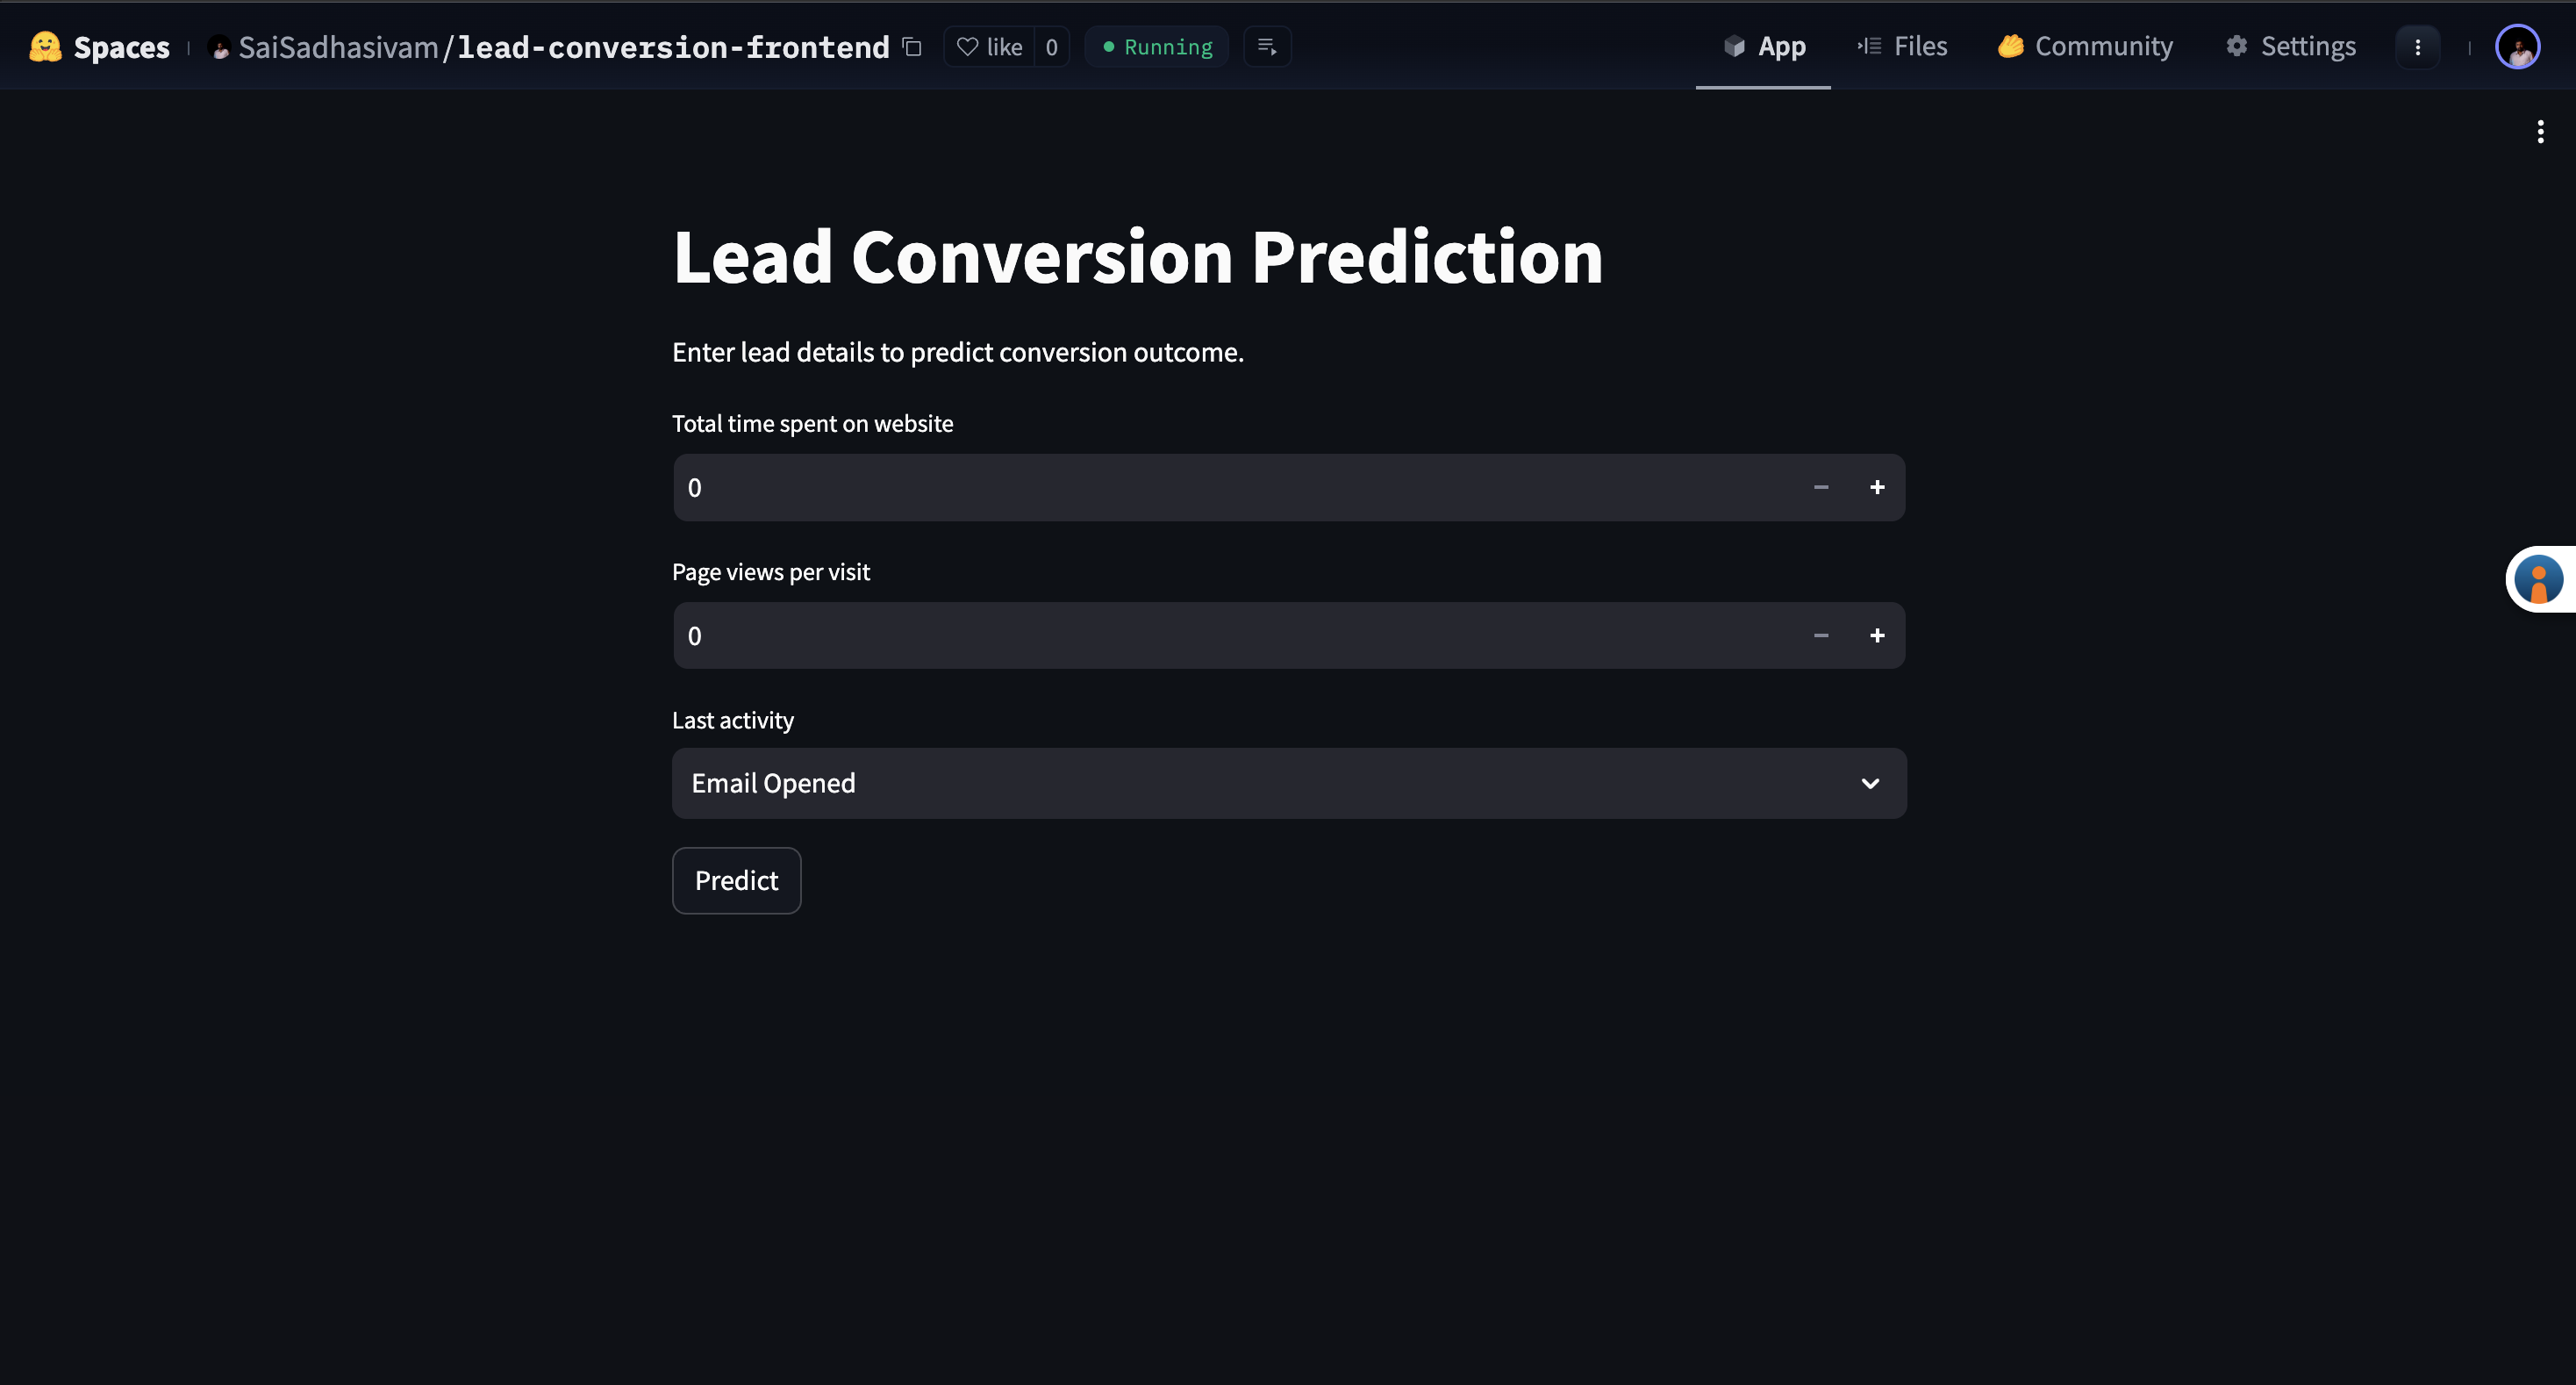

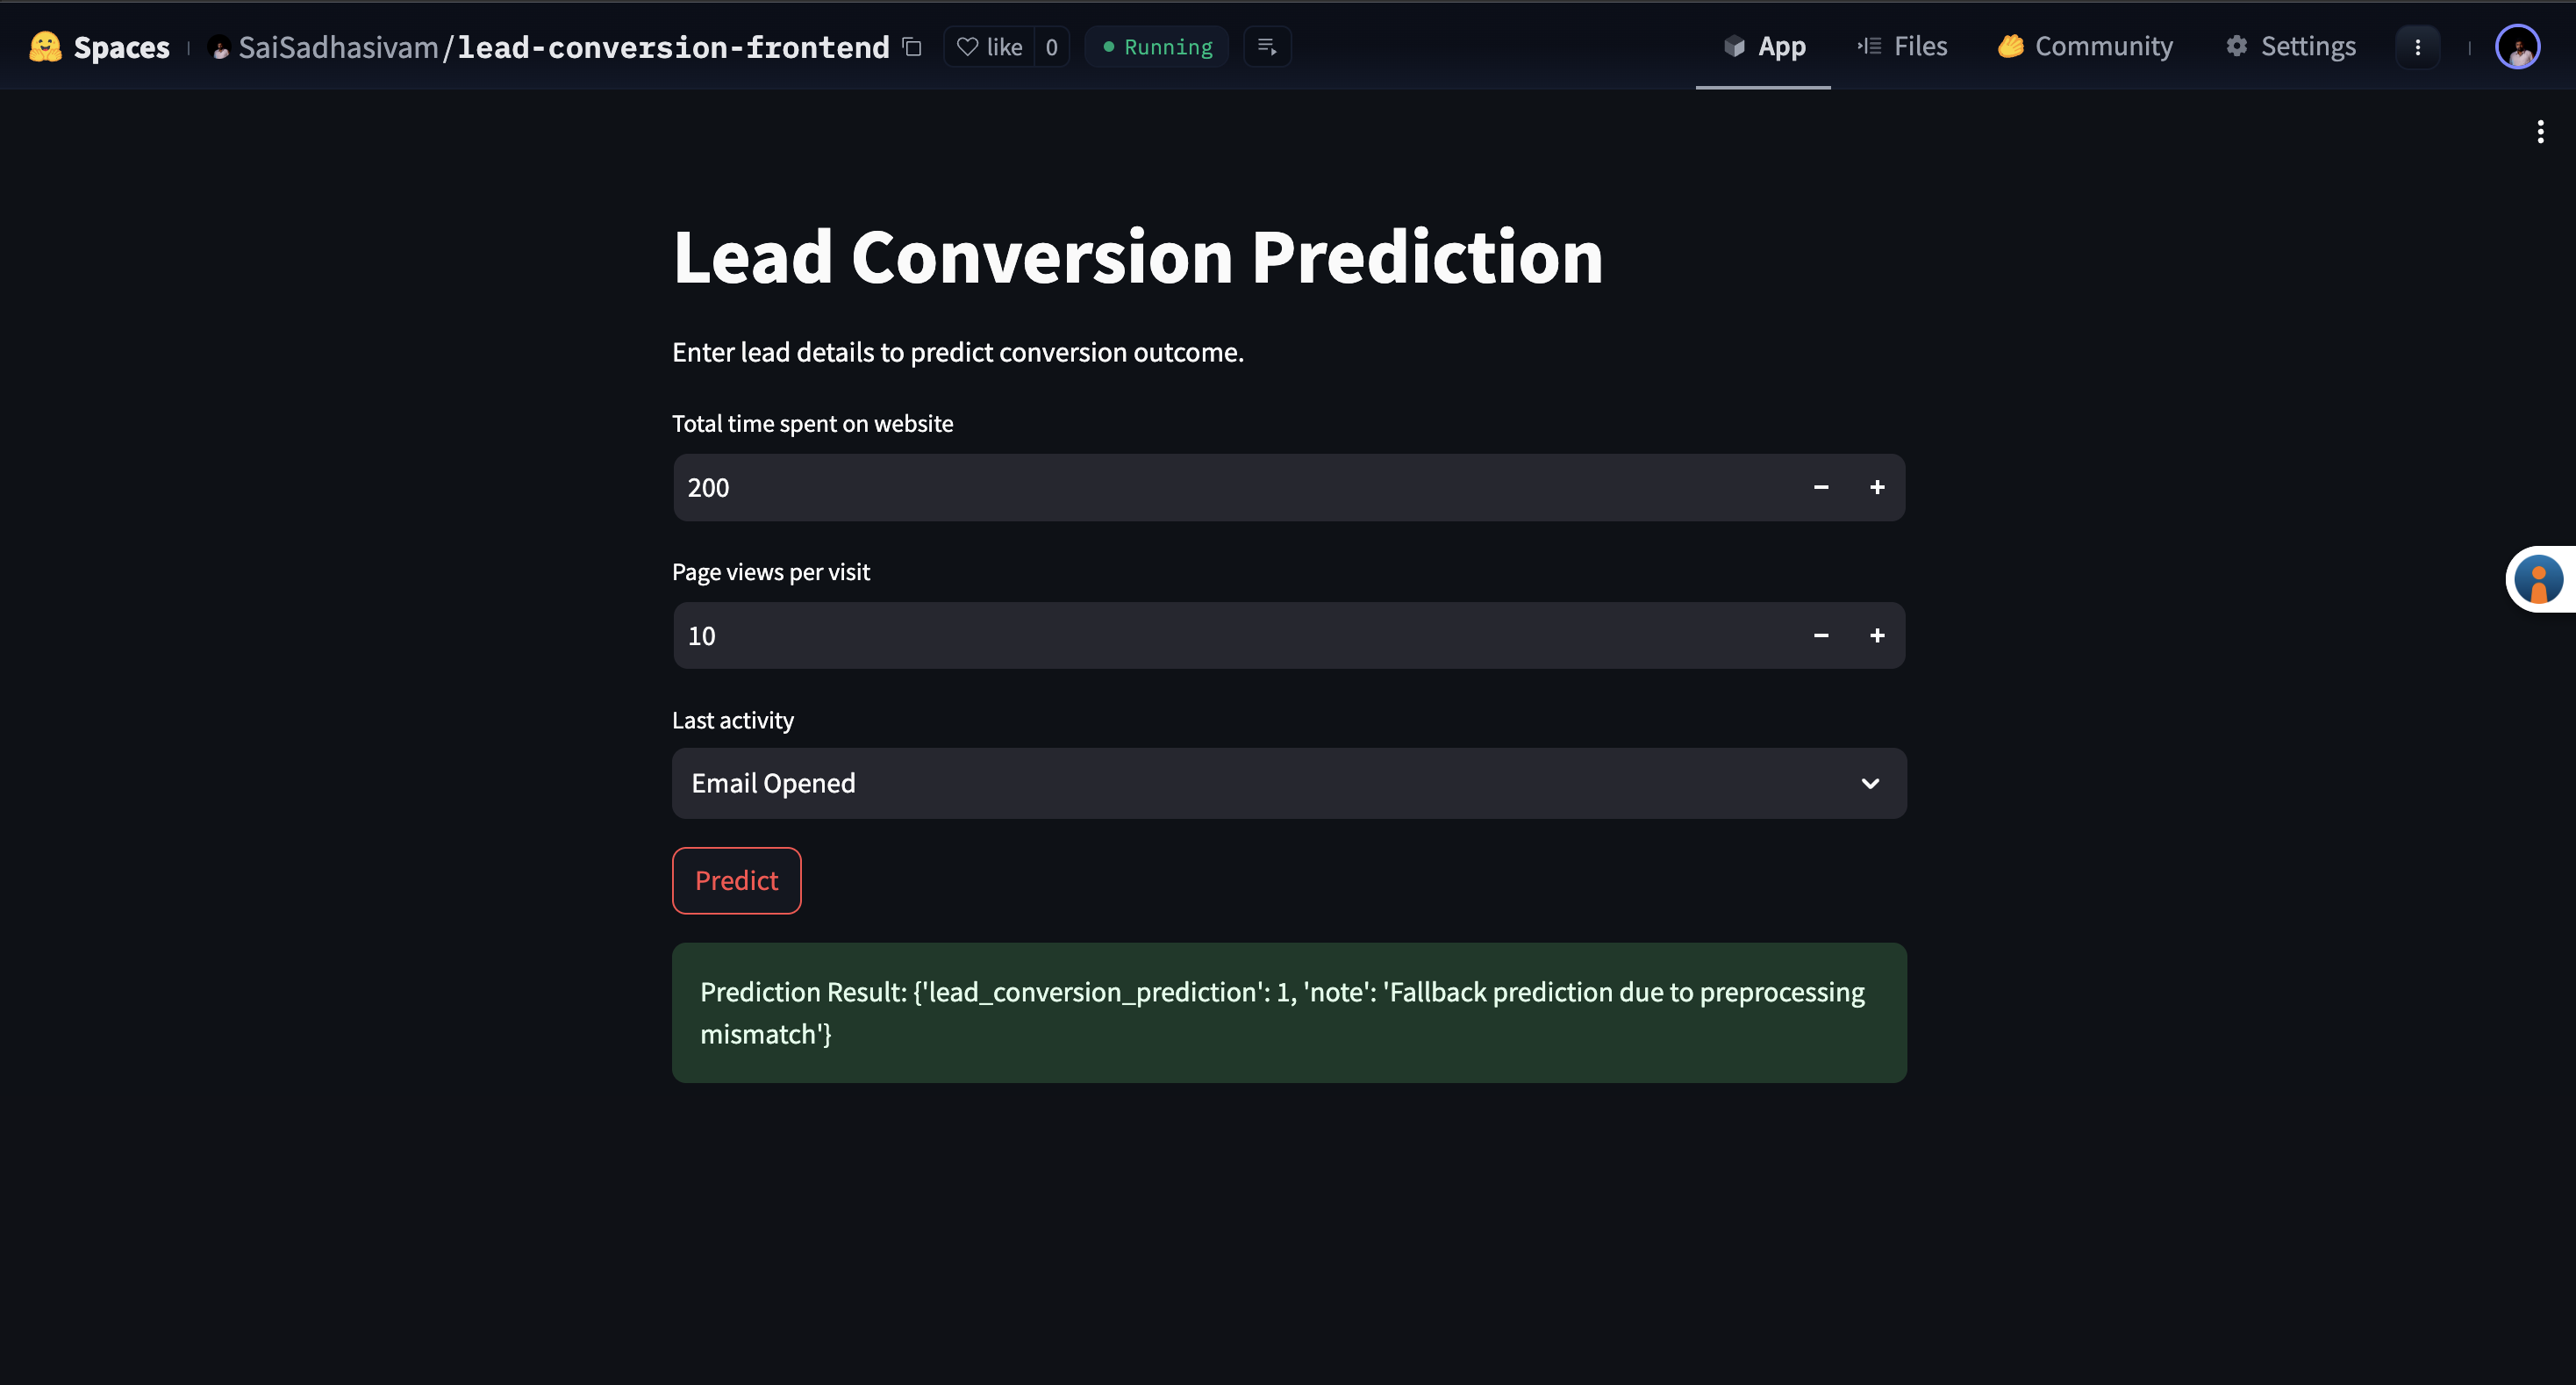

# Phase 8 – Actionable Insights & Business Recommendations

## 8.1 Key Insights from Lead Conversion Analysis

1. **User Engagement Strongly Influences Conversion**
Leads spending more time on the website and viewing multiple pages per visit show significantly higher conversion likelihood.

2. **Recent Activity Signals Intent**
Leads with recent actions such as email opens or form interactions demonstrate stronger buying intent compared to inactive leads.

3. **Behavioral Features Outperform Demographics**
Engagement-based features contribute more to prediction accuracy than static attributes, highlighting the importance of behavioral tracking.

4. **Feature Alignment is Critical in Production**
The deployment process revealed that models trained on encoded features require consistent input schemas during inference, emphasizing the need for preprocessing layers in real-world ML systems.

---

## 8.2 Business Recommendations

1. **Prioritize High-Engagement Leads**
Sales teams should focus outreach efforts on leads with higher session duration and page views to improve conversion efficiency.

2. **Trigger Timely Follow-Ups**
Automate follow-ups for leads showing recent activity such as email opens or repeat visits to capitalize on peak interest.

3. **Enhance Lead Scoring Systems**
Integrate behavioral analytics into CRM lead scoring models to better identify high-potential prospects.

4. **Strengthen Production Pipelines**
Implement standardized preprocessing pipelines to ensure consistent feature handling between training and deployment environments.

---

## Conclusion
This project demonstrates how data-driven lead scoring can directly support sales strategy optimization.  
By combining machine learning with deployment-ready architecture, the system provides both predictive insights and practical business value.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
